In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataset was collected during 60 days, this is a real database of a brazilian logistics company.

In [24]:
df = pd.read_csv('../datasets/Daily_Demand_Forecasting_Orders.csv', sep=';')
df = df[["Banking orders (2)"]]

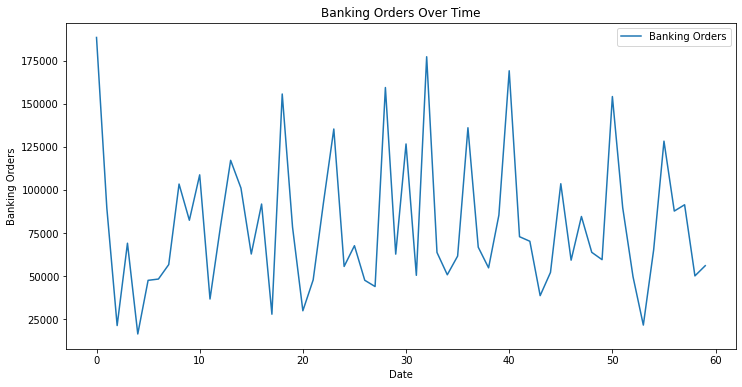

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df["Banking orders (2)"], label="Banking Orders")
plt.title("Banking Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Banking Orders")
plt.legend()
plt.show()

No parece existir un componente estacional. No aplicamos seasonal decompose

Parece que si pero... ¿Es una serie estacionaria?

In [26]:
ADF_result = adfuller(df["Banking orders (2)"])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')


ADF Statistic: -6.360137889083486
p-value: 2.486153918485027e-08


El p-valor es muy bajo, por tanto rechazamos la hipotesis nula de que la serie tiene una raíz unitaria. Es estacionaria y no necesitamos diferenciales

Ploteamos acf y pacf

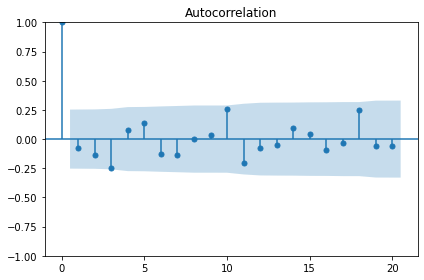

In [27]:
plot_acf(df['Banking orders (2)'], lags=20)
plt.tight_layout()
plt.show()

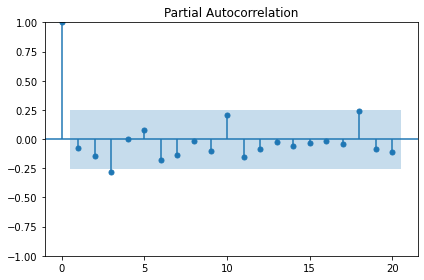

In [28]:
plot_pacf(df['Banking orders (2)'], lags=20)
plt.tight_layout()
plt.show()


¿Que dice la teoría?

![alt text](image.png)

No hay comportamiento claro...probemos alternativas.

Continuar...